In [1]:
#Descargamos las herramientas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import toolbox_ML as tb
from scipy.stats import f_oneway, ttest_ind

In [2]:
#En primer lugar descargamos nuestros datos. Vamos a usar los datos del titanic
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Para comprobar que carga bien
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Desarrollo del ejemplo

## Función describe

In [3]:
# Ver información básica
print(df.info())

# Aplicamos la función de la ToolBox que describe nulos
resumen = tb.describe_df(df)
display(resumen)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Tipo de Dato,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
Nulos,0,0,0,0,0,177,0,0,0,0,687,2
% Nulos,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Valores Únicos,891,2,3,891,2,88,7,7,681,248,147,3


## Función de tipificación de Variables

In [4]:
# Esta función analiza cada columna del dataframe y sugiere qué tipo de variable es según su cardinalidad (cantidad de valores únicos):
# - Si tiene 2 valores únicos → Binaria (ej: Survived: 0 o 1)
# - Si tiene pocos valores únicos → Categórica (ej: Pclass: 1, 2, 3)
# - Si tiene muchos valores únicos → Numérica (continua o discreta)

print("=" * 50)
print("TIPIFICACIÓN DE VARIABLES")
print("=" * 50)
print("Clasificamos cada variable según su cardinalidad...")
tipos = tb.tipifica_variables(df, umbral_categoria=10, umbral_continua=0.95)
display(tipos)

TIPIFICACIÓN DE VARIABLES
Clasificamos cada variable según su cardinalidad...


,Variable,Sugerencia
0,PassengerId,Numérica Continua
1,Survived,Binaria
2,Pclass,Categórica
3,Name,Numérica Continua
4,Sex,Binaria
5,Age,Numérica Continua
6,SibSp,Categórica
7,Parch,Categórica
8,Ticket,Numérica Continua
9,Fare,Numérica Continua


## Función de features numéricas para regresión

In [6]:
# Buscamos variables numéricas que tengan una correlación fuerte con nuestro target.
# En este caso, usamos 'Fare' (precio del billete) como variable objetivo.

# La función nos ayuda a identificar qué variables numéricas influyen en el precio

print("=" * 50)
print("FEATURES NUMÉRICAS PARA REGRESIÓN (Target: Fare)")
print("=" * 50)
print("Buscamos variables numéricas correlacionadas con el precio del billete...")
print("(Usamos correlación de Pearson)")
features_num = tb.get_features_num_regression(df, target_col='Fare', umbral_corr=0.3)
print(f"\nFeatures encontradas: {features_num}")
print(f"Total: {len(features_num)} variables con correlación >= 0.3")

FEATURES NUMÉRICAS PARA REGRESIÓN (Target: Fare)
Buscamos variables numéricas correlacionadas con el precio del billete...
(Usamos correlación de Pearson)

Features encontradas: ['Pclass']
Total: 1 variables con correlación >= 0.3


## Función de visualización de features numéricas

VISUALIZACIÓN DE FEATURES NUMÉRICAS
Pintamos los pairplots de las variables correlacionadas con Fare...
(Cada gráfico muestra máximo 5 variables para mejor visualización)


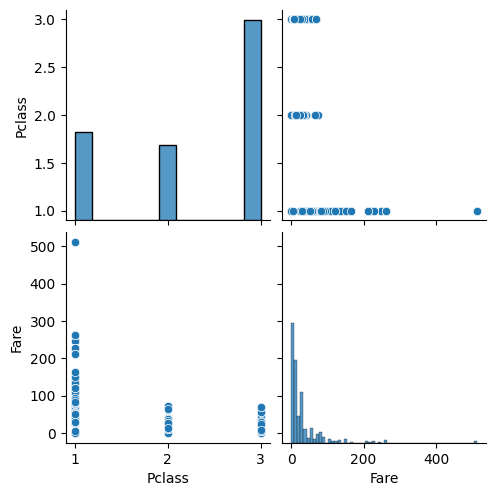


Columnas visualizadas: ['Pclass']


In [8]:
# Ahora pintamos gráficos para VER visualmente esas correlaciones que encontramos.
# La función crea pairplots (gráficos de dispersión entre pares de variables).

print("=" * 50)
print("VISUALIZACIÓN DE FEATURES NUMÉRICAS")
print("=" * 50)
print("Pintamos los pairplots de las variables correlacionadas con Fare...")
print("(Cada gráfico muestra máximo 5 variables para mejor visualización)")
cols_visualizadas = tb.plot_features_num_regression(df, target_col='Fare', umbral_corr=0.3)
print(f"\nColumnas visualizadas: {cols_visualizadas}")

## Función de features categóricas para regresión

In [ ]:
# Ahora buscamos variables CATEGÓRICAS que influyan en el target numérico.
# Usamos ANOVA (Analysis of Variance) que compara las medias entre grupos.
#
# ¿Cómo funciona?
# - Por ejemplo, compara si la media de 'Fare' es diferente entre:
#   * Hombres vs Mujeres (variable 'Sex')
#   * Clase 1 vs Clase 2 vs Clase 3 (variable 'Pclass')
# - Si las medias son MUY diferentes → la variable categórica es importante
#
# Parámetros:
# - p_value=0.05: nivel de significancia estadística (5%)
#   Si p < 0.05 → la diferencia es significativa (no es por azar)

print("=" * 50)
print("FEATURES CATEGÓRICAS PARA REGRESIÓN (Target: Fare)")
print("=" * 50)
print("Aplicamos ANOVA para encontrar variables categóricas significativas...")
print("(Preguntamos: ¿las categorías tienen medias de Fare diferentes?)")
features_cat = tb.get_features_cat_regression(df, target_col='Fare', p_value=0.05)
print(f"\nFeatures encontradas: {features_cat}")
print(f"Total: {len(features_cat)} variables categóricas significativas (p < 0.05)")


FEATURES CATEGÓRICAS PARA REGRESIÓN (Target: Fare)
Aplicamos ANOVA para encontrar variables categóricas significativas...
(Preguntamos: ¿las categorías tienen medias de Fare diferentes?)


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
c:\Users\User\Desktop\datascience\DS-Online-NicoGuitart\TOOLBOX\toolbox_ML.py:90: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = f_oneway(*grupos)



Features encontradas: ['Sex', 'Ticket', 'Cabin', 'Embarked']
Total: 4 variables categóricas significativas (p < 0.05)


## Función de visualización de features categóricas

VISUALIZACIÓN DE FEATURES CATEGÓRICAS
Pintamos histogramas agrupados por categorías...
(Cada gráfico compara cómo varía Fare según los valores de la categoría)


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
c:\Users\User\Desktop\datascience\DS-Online-NicoGuitart\TOOLBOX\toolbox_ML.py:90: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = f_oneway(*grupos)


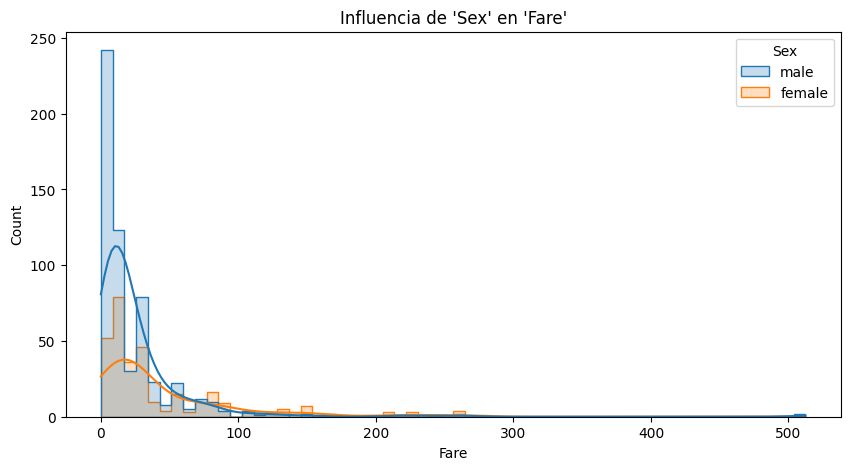

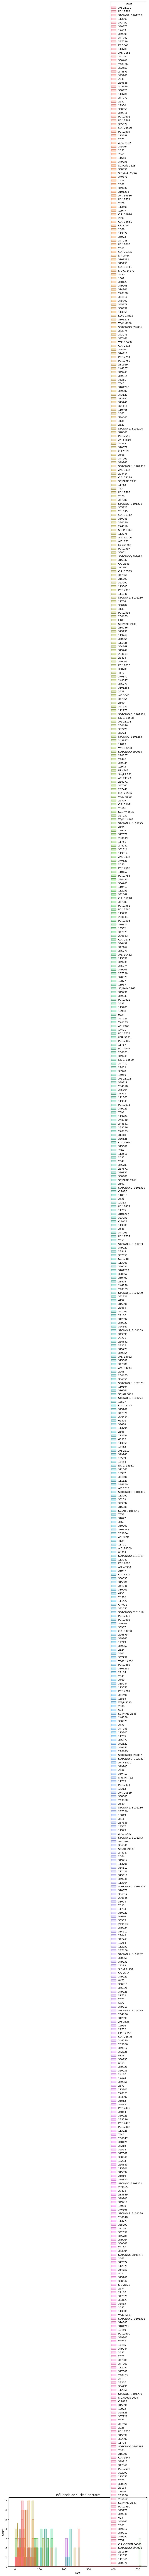

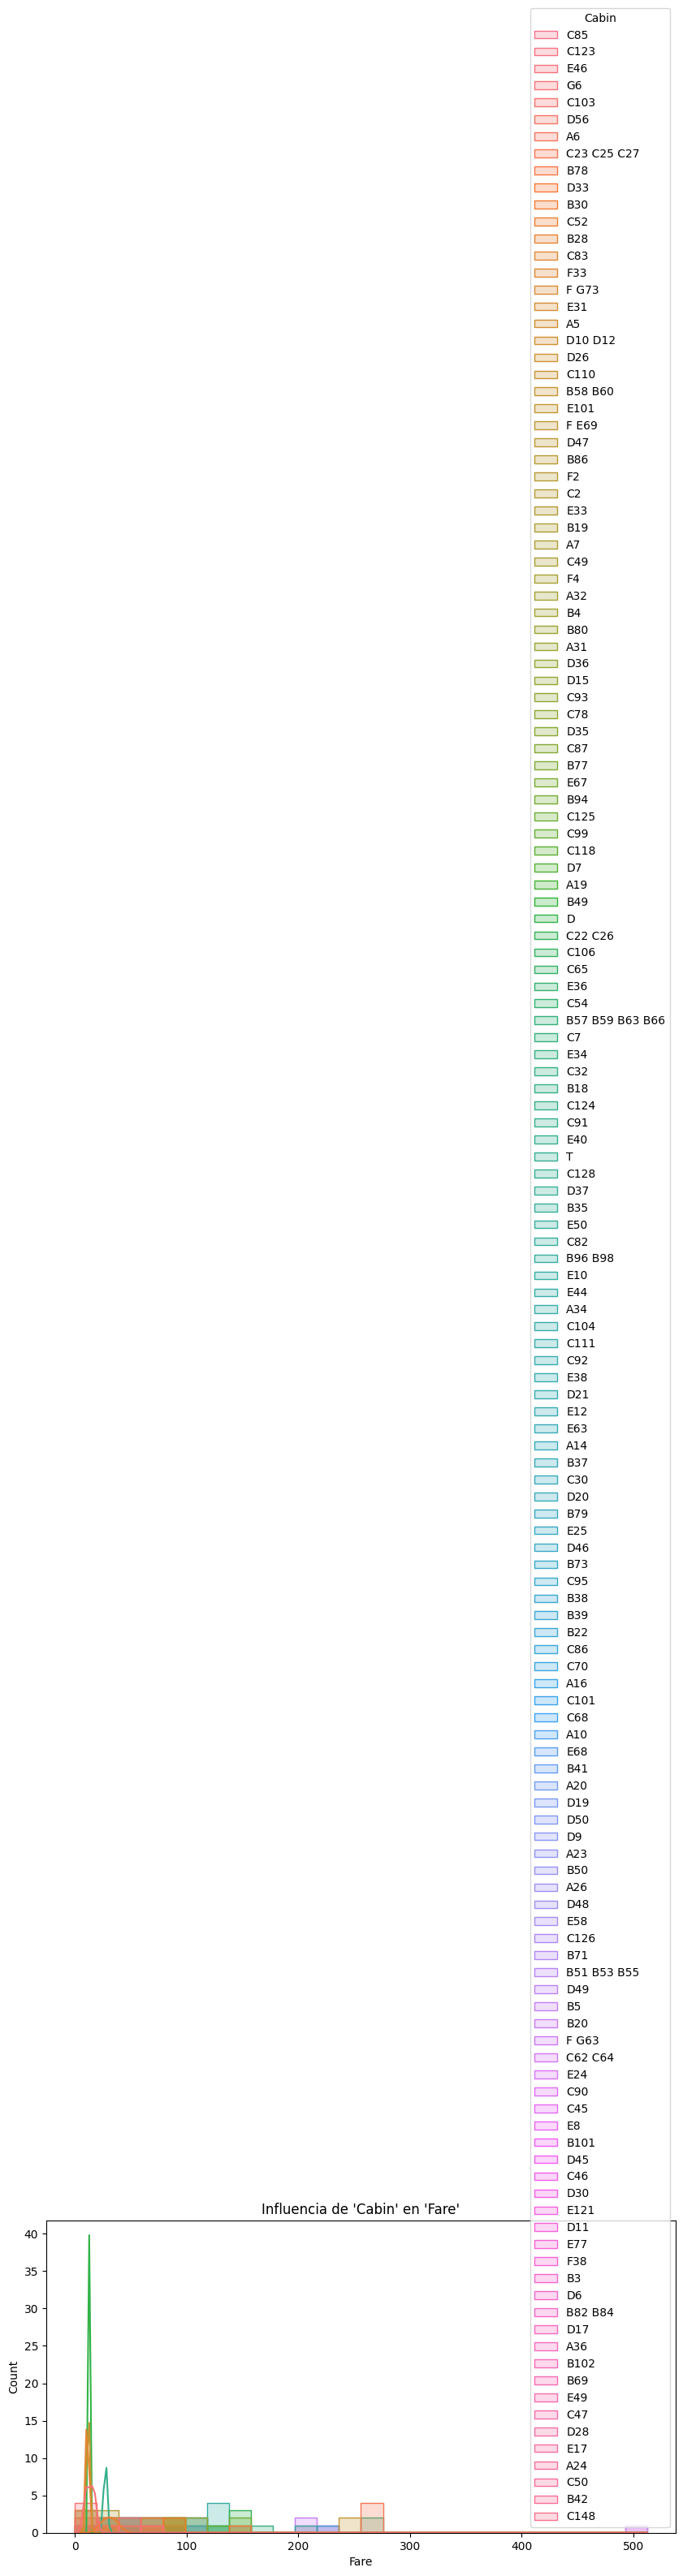

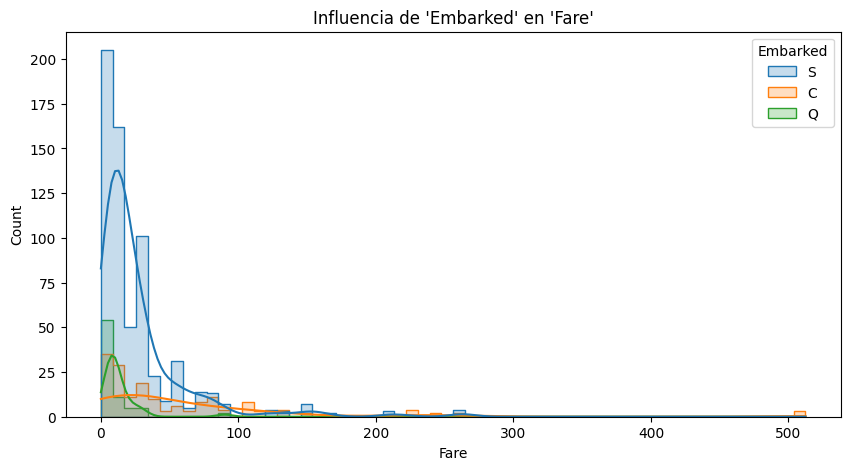


Columnas visualizadas: ['Sex', 'Ticket', 'Cabin', 'Embarked']


In [10]:
# Pintamos histogramas para VER cómo se distribuye el target según cada categoría.

print("=" * 50)
print("VISUALIZACIÓN DE FEATURES CATEGÓRICAS")
print("=" * 50)
print("Pintamos histogramas agrupados por categorías...")
print("(Cada gráfico compara cómo varía Fare según los valores de la categoría)")
cols_cat_visualizadas = tb.plot_features_cat_regression(df, target_col='Fare', p_value=0.05)
print(f"\nColumnas visualizadas: {cols_cat_visualizadas}")

## Ejemplo adicional con otro target

In [11]:
# Para demostrar que el toolbox es FLEXIBLE, probamos con otra variable objetivo.
# Ahora usamos 'Age' (edad) en lugar de 'Fare'.

print("=" * 50)
print("EJEMPLO CON OTRO TARGET: Age")
print("=" * 50)
print("Demostramos la flexibilidad del toolbox con otra variable objetivo...")
print("(Ahora buscamos qué variables influyen en la edad del pasajero)")

print("\n→ Features numéricas correlacionadas con Age:")
print("   (Correlación mínima: 0.2 - más permisivo que antes)")
features_num_age = tb.get_features_num_regression(df, target_col='Age', umbral_corr=0.2)
print(f"   {features_num_age}")

print("\n→ Features categóricas significativas para Age:")
print("   (¿Hay diferencias de edad según sexo, clase, embarque...?)")
features_cat_age = tb.get_features_cat_regression(df, target_col='Age', p_value=0.05)
print(f"   {features_cat_age}")



EJEMPLO CON OTRO TARGET: Age
Demostramos la flexibilidad del toolbox con otra variable objetivo...
(Ahora buscamos qué variables influyen en la edad del pasajero)

→ Features numéricas correlacionadas con Age:
   (Correlación mínima: 0.2 - más permisivo que antes)
   ['Pclass', 'SibSp']

→ Features categóricas significativas para Age:
   (¿Hay diferencias de edad según sexo, clase, embarque...?)
   ['Sex', 'Cabin']


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
c:\Users\User\Desktop\datascience\DS-Online-NicoGuitart\TOOLBOX\toolbox_ML.py:90: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = f_oneway(*grupos)


Si hay pocas variables Age es difícil de predecir con este dataset,
si hay muchas Age está relacionada con varios factores del Titanic